# <b>`Linear Regression Assignment`</b>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

## 1. Data Exploration

In [63]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,mean_absolute_percentage_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("House.csv")

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## 2. Check Data Missing Values

In [8]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 3. Visualize the Data

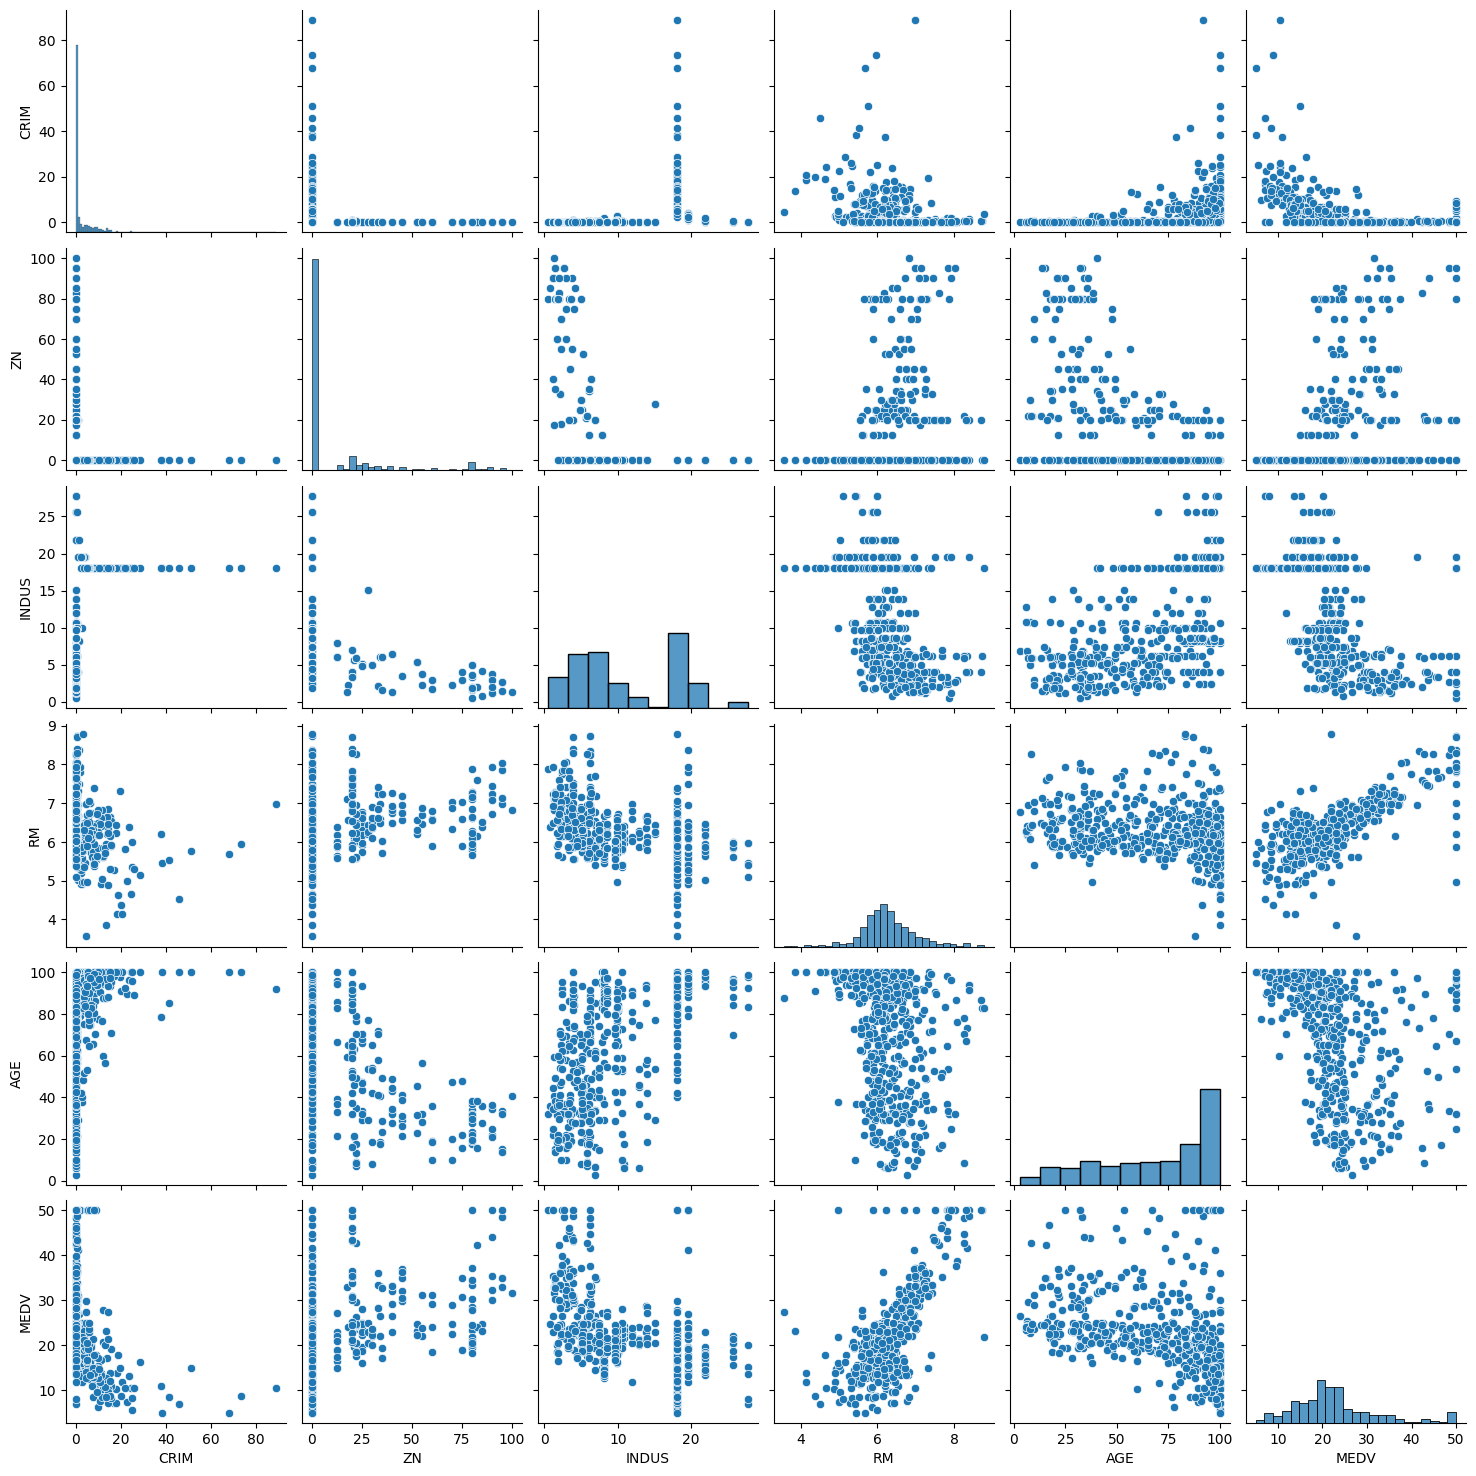

In [10]:
# Pairplot to visualize relationships between variables
sns.pairplot(data, vars=['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'MEDV'])
plt.show()




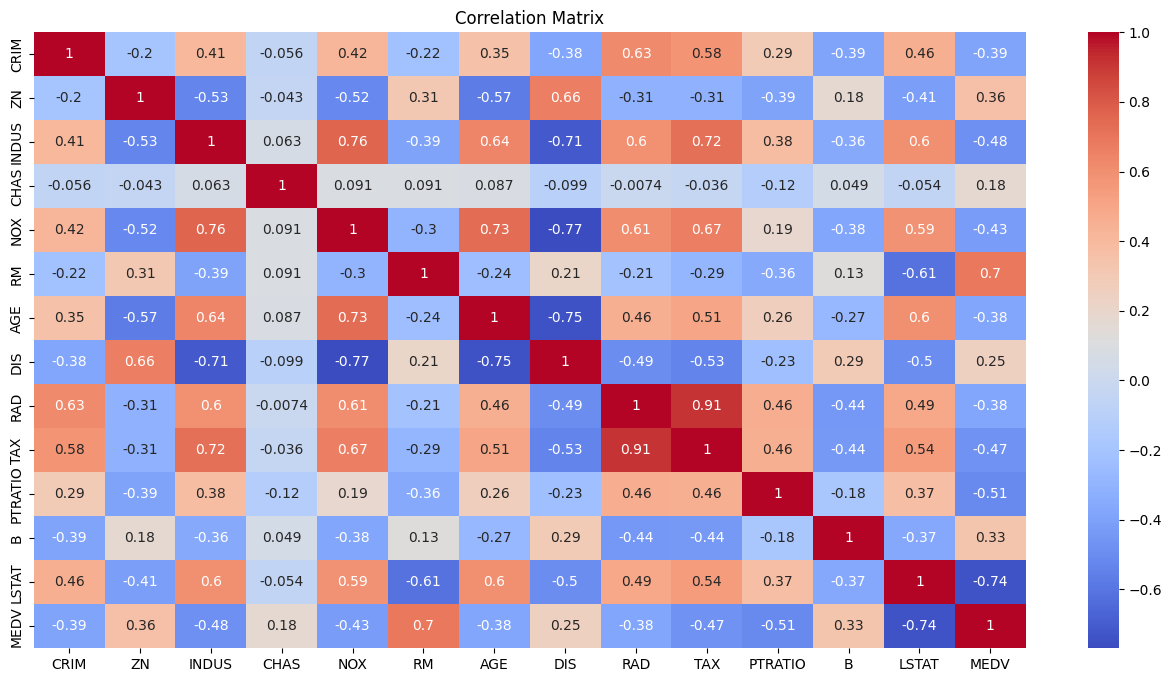

In [15]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 4. Explore the Target Variable:
### Examine the distribution of the target variable (RM).

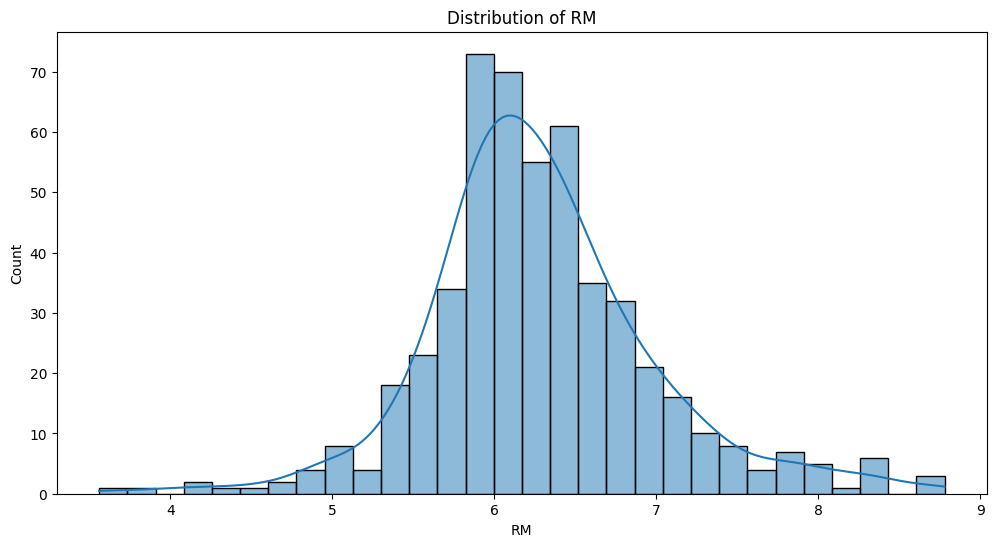

In [19]:
# Distribution of the target variable (MEDV)
plt.figure(figsize=(12, 6))
sns.histplot(data['RM'], bins=30, kde=True)
plt.title('Distribution of RM')
plt.show()


## 4. Explore the Target Variable:
### Examine the distribution of the target variable (RN).

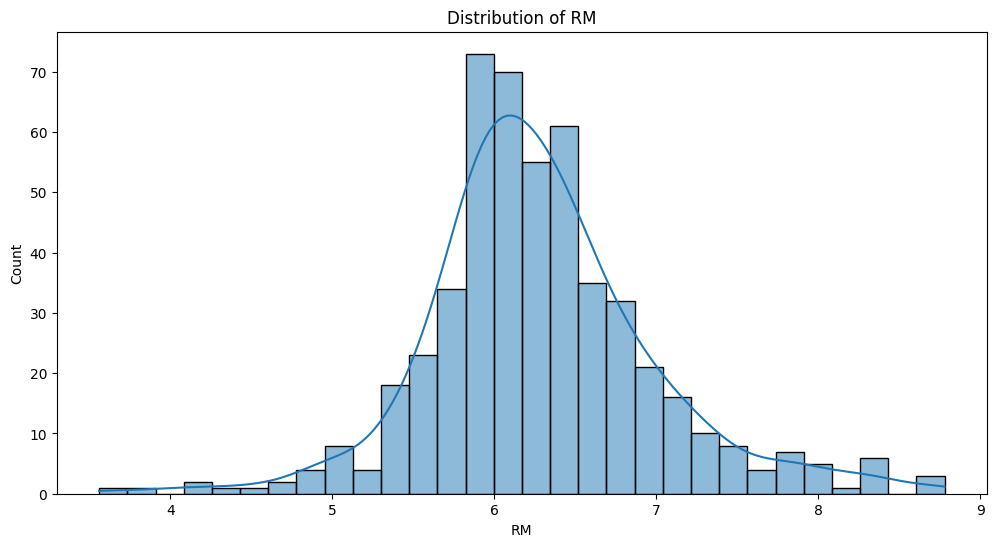

In [32]:
# Distribution of the target variable (MEDV)
plt.figure(figsize=(12, 6))
sns.histplot(data['RM'], bins=30, kde=True)
plt.title('Distribution of RM')
plt.show()


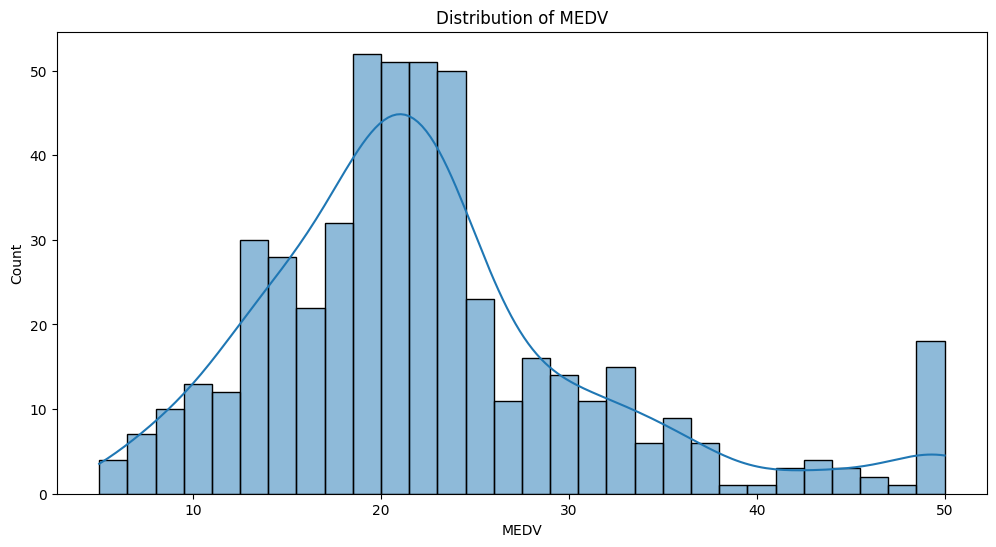

In [26]:
# Distribution of the target variable (MEDV)
plt.figure(figsize=(12, 6))
sns.histplot(data['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV')
plt.show()


## 5. Identify Potential Outliers:
### Check for outliers that may impact the model.

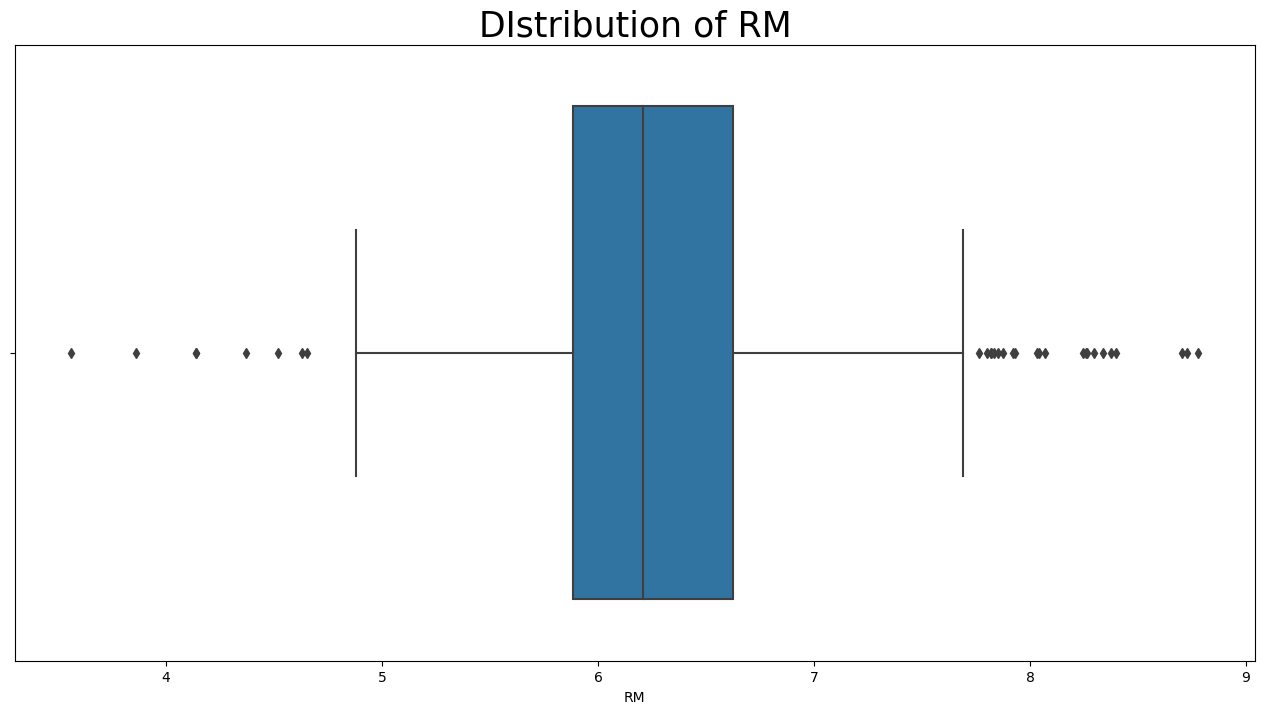

In [45]:
plt.figure(figsize=(16,8))
sns.boxplot(x=data["RM"])
plt.title("DIstribution of RM",size=25)
plt.show()

## 6. Check for Linearity:
### Explore scatter plots of independent variables against the target variable.

C:\Users\santosh\AppData\Local\Temp\ipykernel_1032\4164681992.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='RM', y="MEDV",data=data, palette={'M': 'red','B': 'blue'}, legend = False)


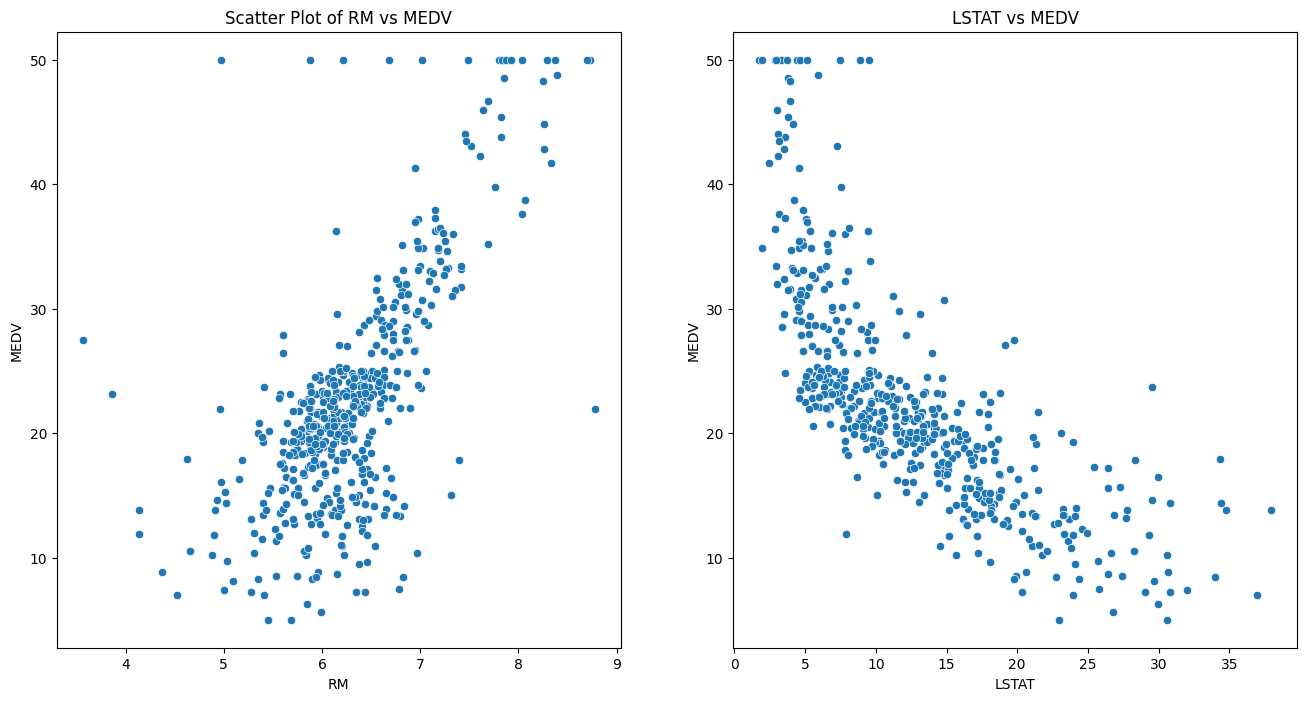

In [54]:
# Scatter plot for selected features
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.scatterplot(x='RM', y="MEDV",data=data, palette={'M': 'red','B': 'blue'}, legend = False)
plt.title('Scatter Plot of RM vs MEDV')

plt.subplot(1, 2, 2)
sns.scatterplot(x='LSTAT', y='MEDV', data=data)
plt.title('LSTAT vs MEDV')

plt.show()



## Prepare Data for Linear Regression

In [59]:
# Select Features and Target variable
X = data[["RM","LSTAT"]]
y = data["MEDV"]
# split the data into training and testing sets
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)
print("Training set shape:",X_train.shape,"Testing set shape:",X_test.shape)


Training set shape: (404, 2) Testing set shape: (102, 2)


## 8. Train Linear Regression Model:
### Use Scikit-learn to train a linear regression model

In [60]:
# Initialize the model
model = LinearRegression()
# fit the modelto the training data
model.fit(X_train,y_train)

LinearRegression()

In [69]:
# Make prediction on the test set
y_pred = model.predict(X_test)

# Evalute the model

print("mean_squared_error :",mean_squared_error(y_test,y_pred))
print("r2_score: ", r2_score(y_test, y_pred))
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))
print("mean_absolute_percentage_error:",mean_absolute_percentage_error(y_test,y_pred))


mean_squared_error : 38.01716762781534
r2_score:  0.6482431532229032
mean_absolute_error: 4.642187421339559
mean_absolute_percentage_error: 0.2387956341654778


## 9. Visualize  Model Performance
### Plot the predicted values against the actual values

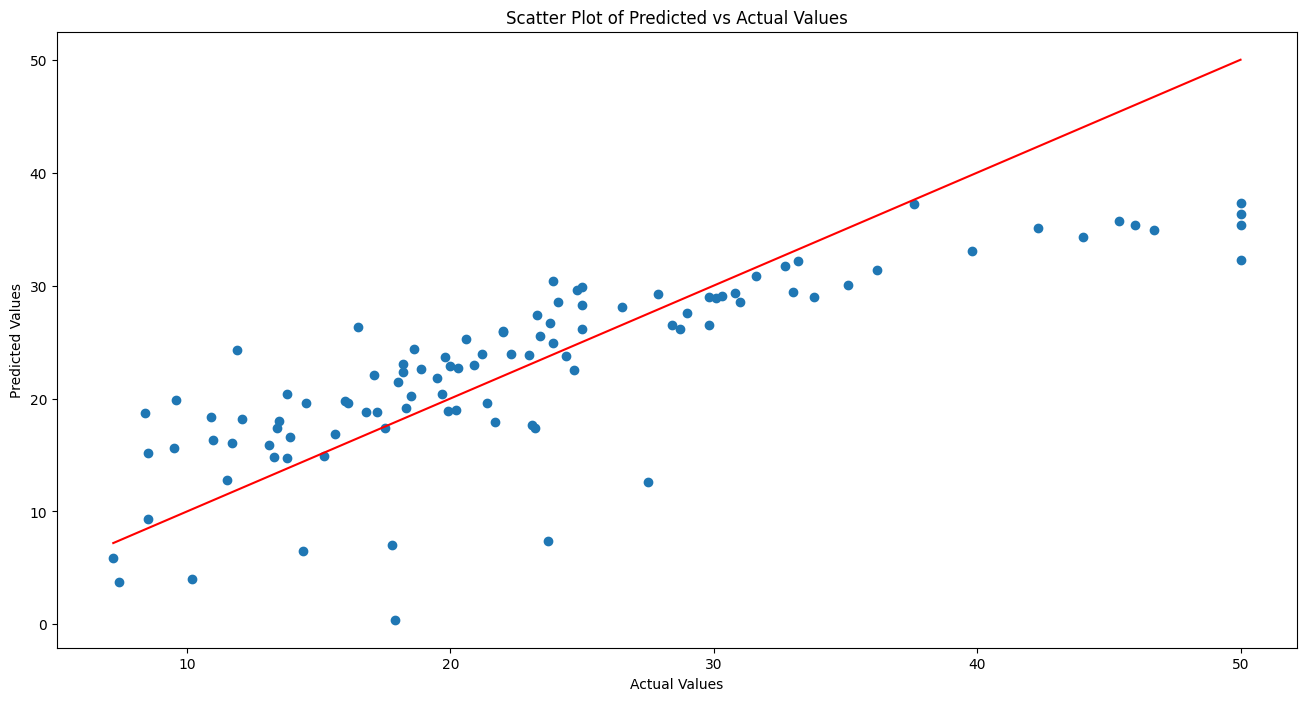

In [72]:
# Scatter plot of predicted Vs actual values
plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="red")
plt.xlabel('Actual Values')
plt.ylabel("Predicted Values")
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

## 10. Interpret Results

In [73]:
# Coefficient and intercept
print("Coefficients:", model.coef_)
print("Intercept: ",model.intercept_)

Coefficients: [ 4.92795043 -0.63979578]
Intercept:  -0.4056443553174738
